<a href="https://colab.research.google.com/github/Armifara/Machine_Learning1/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

### 1. Times Series Decomposition

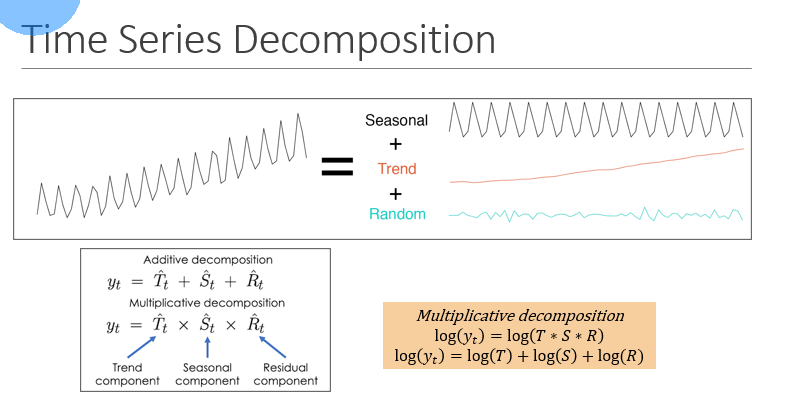

In [1]:
!pip install numpy==1.26.4 pmdarima

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [4]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv


In [6]:
import pandas as pd
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Step 2 - Check Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Step 3 - Data Visualization

In [8]:
import matplotlib.pyplot as plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

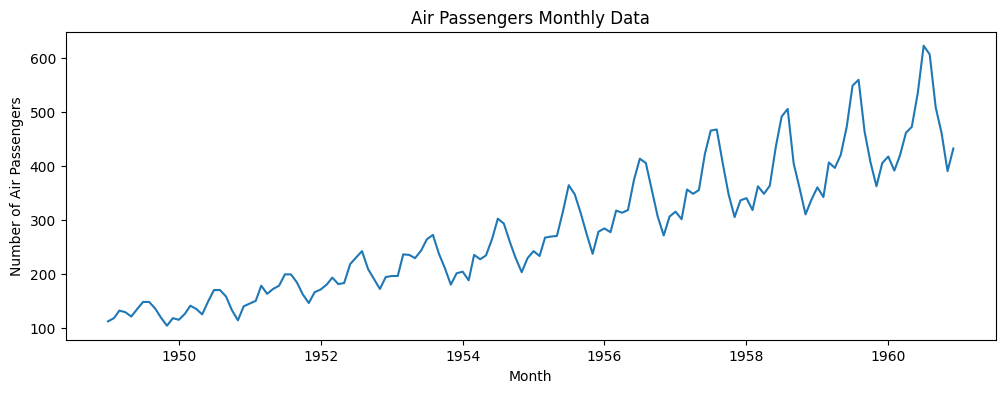

In [9]:
plt.figure(figsize=(12,4))
plt.plot(df["Passengers"])
plt.title("Air Passengers Monthly Data")
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt

Since the above style is slowly increasing in its intensity, it is Multiplicative Seasonality/ Multiplicative Time Series

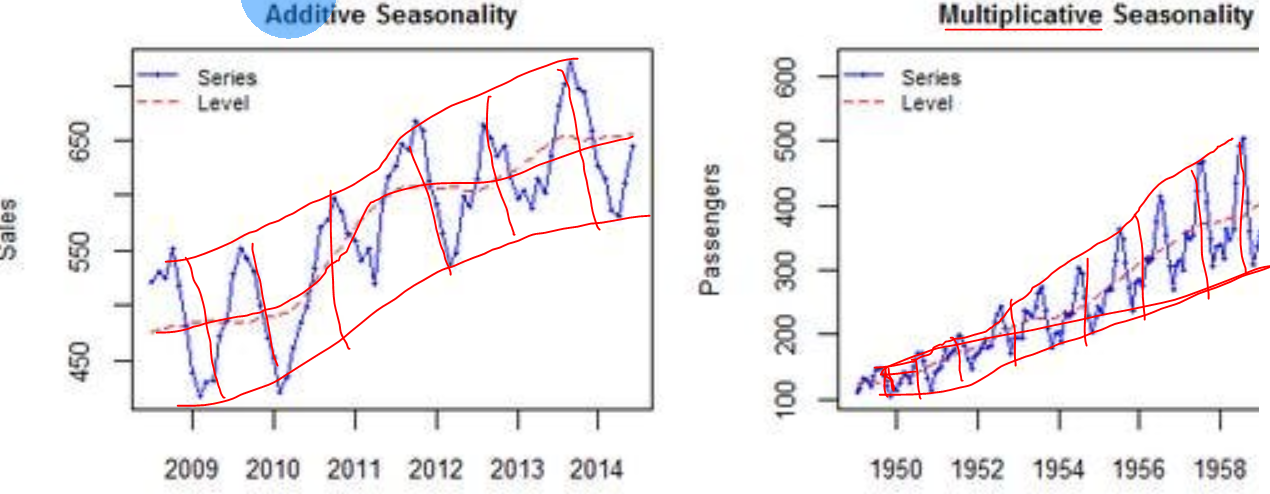

### Step 4 - Times Series Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
s = seasonal_decompose(df["Passengers"], model="mul")

In [12]:
s.observed

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [16]:
s.trend[24:]

,trend
Month,
1951-01-01,157.125000
1951-02-01,159.541667
1951-03-01,161.833333
1951-04-01,164.125000
1951-05-01,166.666667
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


In [17]:
s.seasonal[24:]

,seasonal
Month,
1951-01-01,0.910230
1951-02-01,0.883625
1951-03-01,1.007366
1951-04-01,0.975906
1951-05-01,0.981378
...,...
1960-08-01,1.219911
1960-09-01,1.060492
1960-10-01,0.921757


In [18]:
s.resid[24:]

,resid
Month,
1951-01-01,1.013845
1951-02-01,1.064018
1951-03-01,1.091854
1951-04-01,1.017665
1951-05-01,1.051583
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


### Plot the trend

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

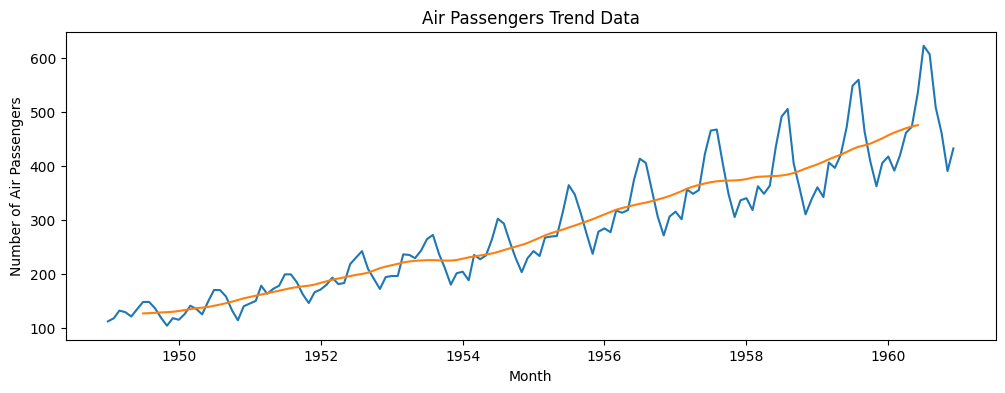

In [19]:
plt.figure(figsize=(12,4))
plt.plot(s.observed)
plt.plot(s.trend)
plt.title("Air Passengers Trend Data")
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt

### Plot the Seasonality

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

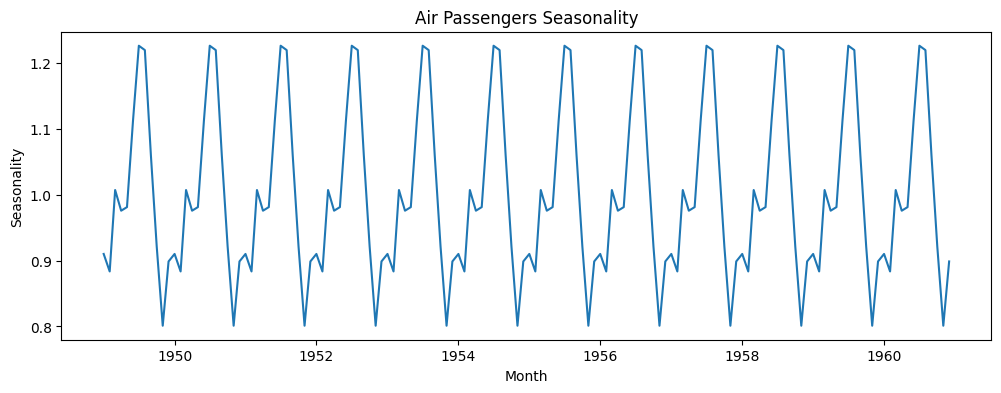

In [21]:
plt.figure(figsize=(12,4))
plt.plot(s.seasonal)
plt.title("Air Passengers Seasonality")
plt.xlabel("Month")
plt.ylabel("Seasonality")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

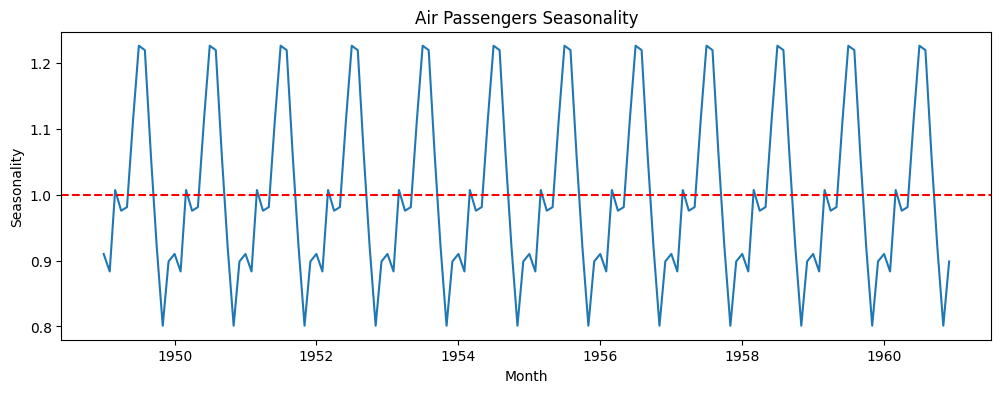

In [24]:
plt.figure(figsize=(12,4))
plt.plot(s.seasonal)
plt.axhline(y =1, color = "red", ls="--")
plt.title("Air Passengers Seasonality")
plt.xlabel("Month")
plt.ylabel("Seasonality")
plt

### Plot the Residual/Randomness

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

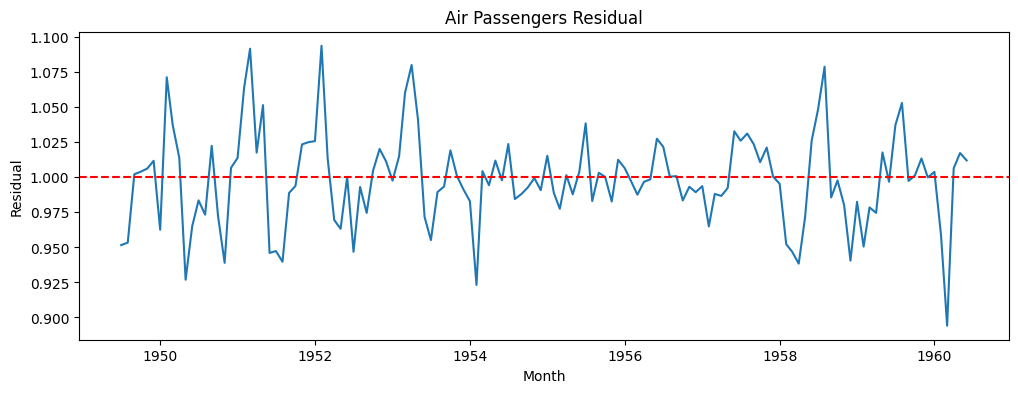

In [23]:
plt.figure(figsize=(12,4))
plt.plot(s.resid)
plt.axhline(y =1, color = "red", ls="--")
plt.title("Air Passengers Residual")
plt.xlabel("Month")
plt.ylabel("Residual")
plt

### yt = Trend * Season * Random

### Time Series Forecast
Based on the current values, estimate future values

# Estimate the Air Passengers Number for the next 4 years

### In Forecast, you provide the low and high limits, also called Confidence Intervals
1. Lower Limit - Lower Confidence Bound
2. Higher Limit - Higher Confidence Bound

To work on Time Series, Model Used
1. ARIMA - Auto Regressive Integrated Moving Average
2. p, d, q is used

1. p (Previous Lags) --> Number of Previous Lags
2. d (Differencing) --> Actual Value - Previous Value
3. q (Moving Average) --> Average of the Errors

In [25]:
import pmdarima as pm

In [26]:
model = pm.auto_arima(
    df["Passengers"],
    seasonal=True,
    m=12,
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.22 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.95 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.31 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.95 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.15 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.37 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.78 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.75 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.63 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.09 sec
 ARIMA(3,1,1)(0,1,0

In [27]:
model

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

1. p - 2
2. d - 1
3. q - 1

In [28]:
model.order

(2, 1, 1)

# Perform Prediction

In [29]:
n = 4
months = n*12
forecast, conf_int = model.predict(n_periods=months, return_conf_int=True)

In [30]:
forecast

,0
1961-01-01,445.634924
1961-02-01,420.395010
1961-03-01,449.198328
1961-04-01,491.839952
1961-05-01,503.394475
1961-06-01,566.862441
1961-07-01,654.260157
1961-08-01,638.597459
1961-09-01,540.883703
1961-10-01,494.126573


In [32]:
conf_int

array([[423.3448346 , 467.92501276],
       [394.23537501, 446.55464442],
       [419.83168422, 478.56497202],
       [460.37622791, 523.30367657],
       [470.38041866, 536.40853182],
       [532.69928309, 601.02559869],
       [619.22109181, 689.29922222],
       [602.87979331, 674.3151249 ],
       [504.6311681 , 577.1362384 ],
       [457.44579915, 530.80734671],
       [386.30368922, 460.36161495],
       [428.1911504 , 502.8238715 ],
       [433.49731294, 525.08429446],
       [405.10864692, 503.24491676],
       [431.15538434, 535.01845673],
       [471.84027967, 579.79808509],
       [481.87329418, 593.02793   ],
       [544.15629206, 657.81137512],
       [630.60845165, 746.26538783],
       [614.17884156, 731.46356577],
       [515.8320561 , 634.46256831],
       [468.54374041, 588.30427377],
       [397.29688215, 518.02069215],
       [439.07953624, 560.63646162],
       [446.326804  , 580.99710658],
       [418.31787371, 558.81305956],
       [444.62390274, 590.35706201],
 

In [33]:
df_forecast = forecast.to_frame()
df_forecast.columns = ["forecast"]

In [34]:
df_forecast

,forecast
1961-01-01,445.634924
1961-02-01,420.395010
1961-03-01,449.198328
1961-04-01,491.839952
1961-05-01,503.394475
1961-06-01,566.862441
1961-07-01,654.260157
1961-08-01,638.597459
1961-09-01,540.883703
1961-10-01,494.126573


In [36]:
df_forecast[["lower", "upper"]] = conf_int
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,forecast,lower,upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


In [37]:
df_forecast.index.name = "Month"
df_forecast

,forecast,lower,upper
Month,,,
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577


In [38]:
df_forecast.to_csv("forecast.csv")

# Visualization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

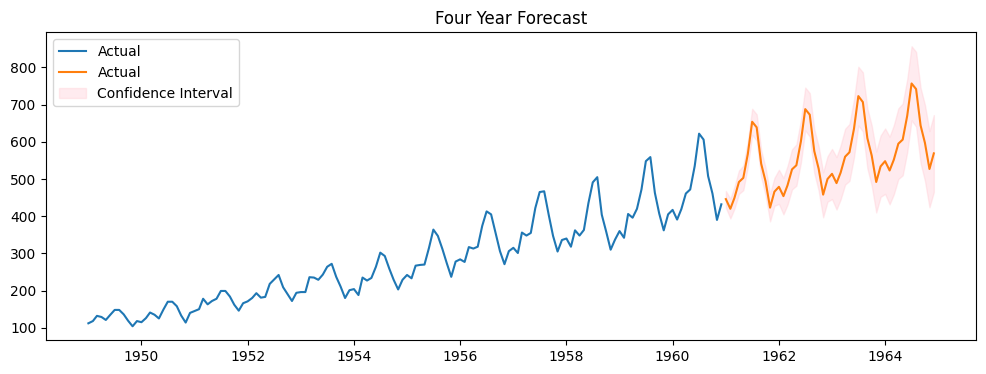

In [40]:
plt.figure(figsize=(12,4))
plt.plot(df["Passengers"], label = "Actual")
plt.plot(df_forecast["forecast"], label = "Actual")
plt.fill_between(
    df_forecast.index,
    df_forecast["lower"],
    df_forecast["upper"],
    color = "pink",
    alpha = 0.3,
    label = "Confidence Interval"
)
plt.legend()
plt.title("Four Year Forecast")
plt